<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_Curso_R/blob/main/ERAP_R_Course_moduloIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Manipulación de datos con R - Módulo III (Visualización de Datos con ggplot2)

Autor(es): Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

Fecha: 2025-06

Institución: Universidad de La Rioja

# ¿Qué es ggplot2?
ggplot2 es un paquete del lenguaje R para crear gráficos de manera declarativa y elegante. Es parte del ecosistema **tidyverse** y está diseñado para generar gráficos a partir de datos organizados en data frames (tibbles o similares) (tidy data).

Se basa en la Gramática de los Gráficos (Grammar of Graphics) propuesta por Leland Wilkinson, la cual establece un sistema coherente para construir visualizaciones a partir de componentes independientes que se pueden combinar.

A grandes rasgos, se compone de tres elementos:

```
ggplot(data = <datos>) +
  aes(x = <var_x>, y = <var_y>) +
  geom_<tipo>() +
  otros_componentes()

```

- El conjunto de datos.
- La estética o atributos-propiedades visuales de la geometría (**aes()**):

Define cómo se *mapean* las variables de los datos a propiedades visuales del gráfico: posición en los ejes, color, forma, tamaño, etc. No dibuja nada por sí misma, solo establece qué variable va en qué parte del gráfico, lo que crea es el **lienzo**.

Por ejemplo:
```
aes(x = displ, y = hwy)
```

Nos está diciendo que la variable **displ** (cilindrada del motor) irá en el eje **x** y **hwy** (rendimiento en autopista) irá en el eje **y**.


Valores estéticos comunes:
| Estética        | ¿Dónde se aplica?        | Tipo de variable    | Descripción                                                                                                                                                                                    |
| --------------- | ------------------------ | ------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`color`**     | Bordes (líneas, puntos)  | Discreta o continua | Define el **color del contorno** de los elementos gráficos, como puntos o líneas. En variables categóricas, genera una paleta automática; en variables continuas, crea un gradiente.           |
| **`fill`**      | Áreas (barras, cajas...) | Discreta o continua | Controla el **color de relleno** de formas cerradas: barras, cajas, polígonos. Muy útil en `geom_bar()`, `geom_boxplot()`, `geom_col()`...                                                     |
| **`size`**      | Puntos, líneas           | Continua            | Controla el **tamaño de los puntos o el grosor de líneas**. Suele usarse para representar una tercera variable en gráficos de dispersión.                                                      |
| **`linewidth`** | Líneas                   | Continua            | Define el **grosor de las líneas** (equivalente a `size`, pero específico para líneas desde `ggplot2` v3.4+). Mejora la claridad al usar líneas múltiples con distintos anchos.                |
| **`shape`**     | Puntos (`geom_point`)    | Discreta            | Determina la **forma del punto** (círculo, triángulo, cruz, etc.). Ideal para variables categóricas. Hay 25 formas disponibles, algunas con relleno (`fill`) y otras solo con borde (`color`). |



Es importante nota que los valores dentro de aes() deben ser columnas del conjunto de datos.


- La geometría de los elementos (**geom_*()**):
Es la capa que define qué tipo de gráfico se dibuja: puntos, líneas, barras, cajas, etc. Utiliza las variables mapeadas con aes() para dibujar elementos gráficos.

Ejemplo:
```
geom_point()
```
Crea un gráfico de dispersión (scatter plot), colocando puntos según los valores de **x** e **y** definidos en aes().

Geometrías, que iremos viendo que podemos usar según el o los tipos de variables.

| Geometría (`geom_*`)           | Tipo de variable X  | Tipo de variable Y  | Uso común                                           |
| ------------------------------ | ------------------- | ------------------- | --------------------------------------------------- |
| `geom_point()`                 | Continua o discreta | Continua            | Diagrama de dispersión                              |
| `geom_line()`                  | Continua            | Continua            | Serie temporal o curvas                             |
| `geom_smooth()`                | Continua            | Continua            | Tendencia o regresión                               |
| `geom_bar(stat = "count")`     | Discreta            | -                   | Conteo de categorías                                |
| `geom_col()`                   | Discreta            | Continua            | Altura basada en valor numérico                     |
| `geom_boxplot()`               | Discreta            | Continua            | Comparar distribuciones                             |
| `geom_violin()`                | Discreta            | Continua            | Distribuciones suavizadas                           |
| `geom_histogram()`             | Continua            | -                   | Distribución de frecuencias                         |
| `geom_density()`               | Continua            | -                   | Distribución suavizada                              |
| `geom_area()`                  | Continua            | Continua            | Área bajo curva (acumulada)                         |
| `geom_jitter()`                | Discreta o continua | Continua            | Puntos dispersos con ruido para evitar solapamiento |
| `geom_boxplot()`               | Discreta (x)        | Continua (y)        | Comparación de rangos y medianas                    |
| `geom_dotplot()`               | Discreta            | Discreta o continua | Distribución por acumulación de puntos              |
| `geom_tile()`                  | Discreta            | Discreta            | Mapa de calor con categorías                        |
| `geom_rug()`                   | Continua            | -                   | Indicadores marginales en los ejes                  |
| `geom_text()` / `geom_label()` | Discreta o continua | Discreta o continua | Añadir etiquetas a los puntos                       |



In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


No vignettes or demos or help files found with alias or concept or
title matching ‘ggplot2’ using fuzzy matching.

In [4]:
library(ggplot2)
?ggplot2

Veremos un ejemplo con datos de laboratorio (datos incluídos en la librería ggplo2).

**Conjunto de datos: mpg**

El dataset mpg proviene del paquete ggplot2 y contiene información sobre el rendimiento de modelos de automóviles en EE.UU., recogida por la Agencia de Protección Ambiental (EPA). Es ideal para aprender a visualizar relaciones entre variables cuantitativas y cualitativas.


In [7]:
data(mpg)
glimpse(mpg)
summary(mpg)


Rows: 234
Columns: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi", "…
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro", "…
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.…
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, 200…
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, …
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "auto…
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4", "4…
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, 1…
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, 2…
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p…
$ class        <chr> "compact", "compact", "compact", "compact", "compact", "c…


 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

| Variable       | Tipo              | Descripción                                                             |
| -------------- | ----------------- | ----------------------------------------------------------------------- |
| `manufacturer` | Categórica        | Marca del automóvil (ej. "audi", "ford")                                |
| `model`        | Categórica        | Modelo del vehículo                                                     |
| `displ`        | Numérica continua | Cilindrada del motor (en litros)                                        |
| `year`         | Numérica discreta | Año de fabricación (1999 o 2008)                                        |
| `cyl`          | Numérica discreta | Número de cilindros del motor                                           |
| `trans`        | Categórica        | Tipo de transmisión (automática/manual)                                 |
| `drv`          | Categórica        | Tipo de tracción (`f` = delantera, `r` = trasera, `4` = tracción total) |
| `cty`          | Numérica continua | Consumo de combustible en ciudad (millas por galón)                     |
| `hwy`          | Numérica continua | Consumo de combustible en autopista (mpg)                               |
| `fl`           | Categórica        | Tipo de combustible (`p` = gasolina, `d` = diésel, etc.)                |
| `class`        | Categórica        | Clase del vehículo (compacto, SUV, minivan...)                          |


Comenzamos conla creación de diferentes gráficos:

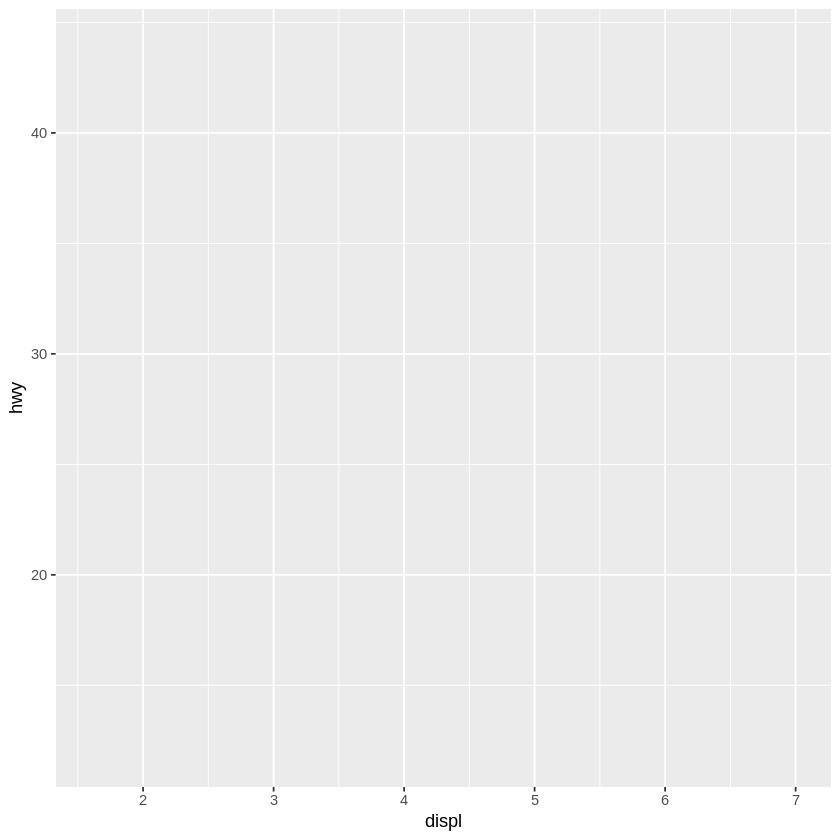

In [10]:
#digamos que comenzamos con ¿qué vemos?:
ggplot(data = mpg, aes(x = displ, y = hwy))
# usando la estructura de Dplyr:
#mpg %>%
  #ggplot(aes(x = displ, y = hwy))

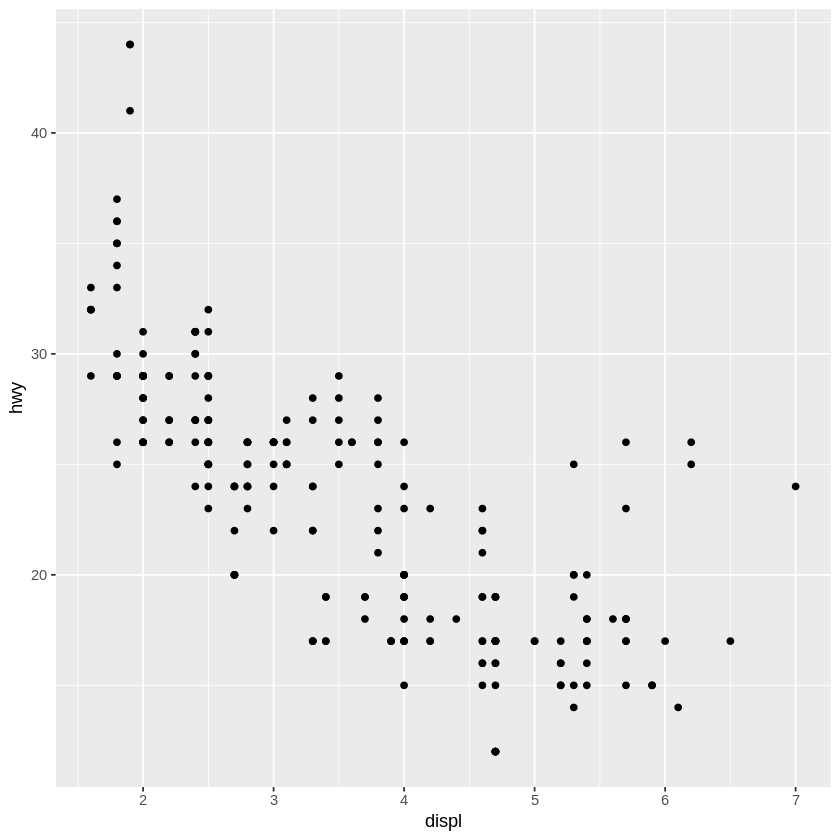

In [13]:
#cuando ya añado la geometría vemos algo:
mpg %>%
  ggplot(aes(x = displ, y = hwy)) +
  geom_point()

#Ahora se genera correctamente el gráfico porque geom_point() indica cómo representar las variables ya mapeadas.
# Es decir, siempre es necesario agregar 1 o más capas al lienzo (a la estética)

¿Qué tipo de relación vemos entre estas dos variables?:

En general, motores más grandes (más cilindrada) consumen más combustible, lo que se traduce en menor rendimiento en autopista. Este patrón es esperable, y el gráfico lo representa de forma clara y visual.

## Ejercicios:

1. Realiza un gráfico de dispersión del consumo de combutible en autopista en función del número de cilindros del motor

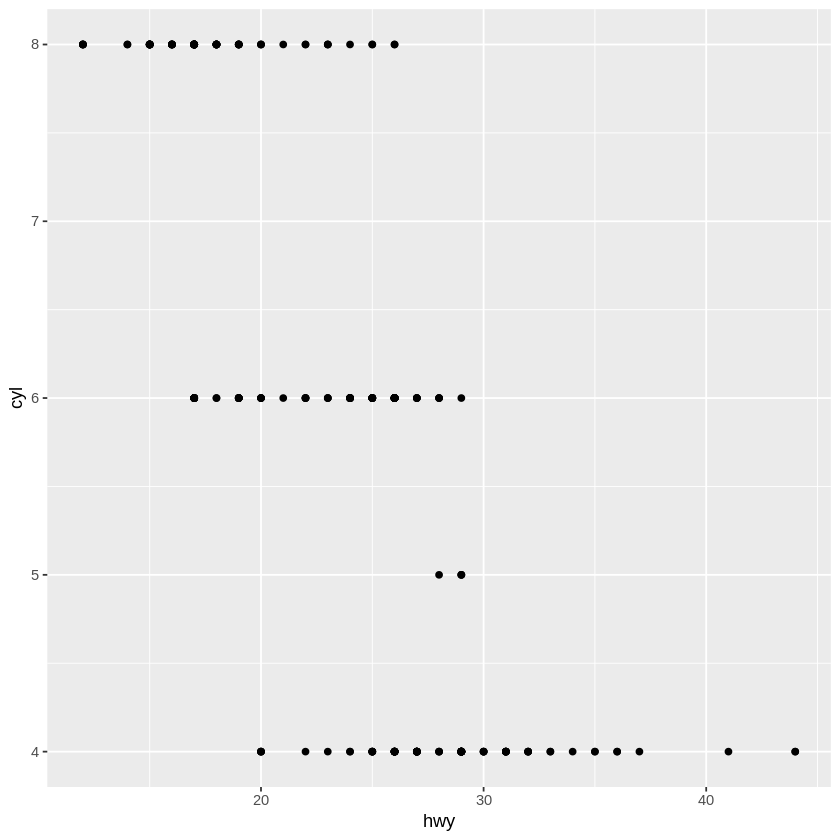

In [16]:
#Estilo tidyverse con pipe (%>%)
mpg%>%
  ggplot(aes(hwy,cyl))+
  geom_point()

# Estilo clásico de ggplot:

#ggplot(data = mpg, aes(x = hwy, y = cyl)) +
  # geom_point()

#asignando a un objeto:

#g <- ggplot(mpg, aes(hwy, cyl))
#g + geom_point()



2. ¿Qué sucede si hacemos un gráfico de dispersión de la variable *clase* versus tipo de traccion?

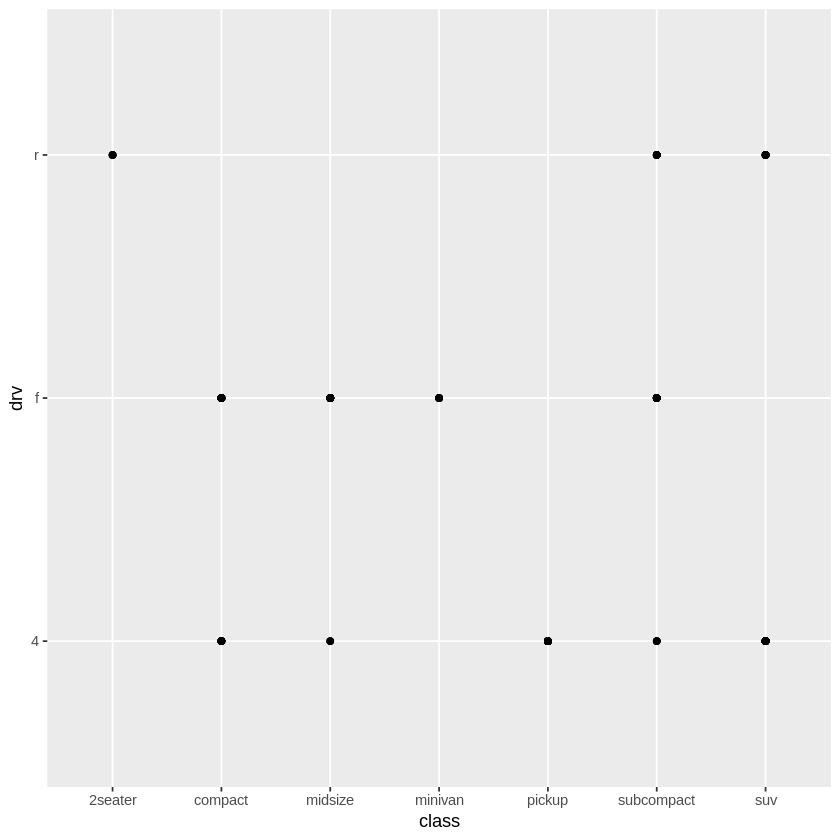

In [17]:
ggplot(data=mpg)+
geom_point(mapping = aes(x=class, y=drv))
